Popularity-based rule is the simplest form: a product is recommended based on its popularity

In [1]:
# Import statements

In [4]:
import pandas as pd 
import numpy as np 

# Libraries for vizualisation
import seaborn as sns 
import matplotlib.pyplot as plt 

data\data.csv

In [8]:
%matplotlib inline 

# Data Loading

In [34]:
import pandas as pd

# Read the CSV file using relative path
df = pd.read_csv("../data/data.csv", encoding="unicode_escape")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# EDA

In [35]:
# Null value
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [36]:
# Drop rows with no description
df_new = df.dropna(subset=['Description'])
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Get basics statistics

In [37]:
df_new.describe()

,Quantity,UnitPrice,CustomerID
count,540455.000000,540455.000000,406829.000000
mean,9.603129,4.623519,15287.690570
std,218.007598,96.889628,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


WE see that the Quantity columns has negative values, that is impossible, we gonna remove them

In [38]:
df_new = df_new[df_new.Quantity > 0]
df_new.describe()

,Quantity,UnitPrice,CustomerID
count,530693.000000,530693.000000,397924.000000
mean,10.605819,3.861599,15294.315171
std,156.637853,41.833162,1713.169877
min,1.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


We gonna make some basics recommendation based just on popularity

In [49]:
df_new.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [50]:
# Getting popular items from the dataset
global_popularity = df_new.pivot_table(index=['StockCode', 'Description'], values='Quantity', aggfunc='sum').\
                    sort_values(by="Quantity", ascending=False)

print("Top 20 popular items globally")
global_popularity.head(20)

Top 20 popular items globally


,,Quantity
StockCode,Description,
23843,"PAPER CRAFT , LITTLE BIRDIE",80995
23166,MEDIUM CERAMIC TOP STORAGE JAR,78033
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
85099B,JUMBO BAG RED RETROSPOT,48478
85123A,WHITE HANGING HEART T-LIGHT HOLDER,37603
22197,POPCORN HOLDER,36761
84879,ASSORTED COLOUR BIRD ORNAMENT,36461
21212,PACK OF 72 RETROSPOT CAKE CASES,36419
23084,RABBIT NIGHT LIGHT,30788


We got the most 20 popular items globally(across all countries)

# Visualization of popularity

Text(0, 0.5, 'Item')

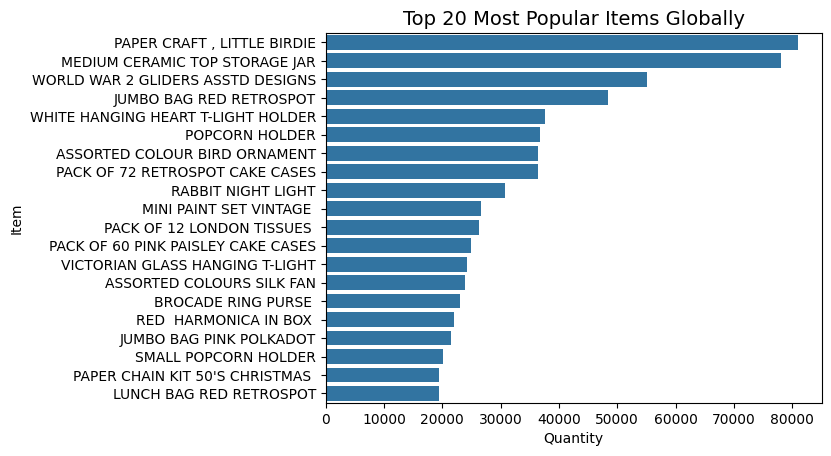

In [51]:
global_popularity.reset_index(inplace=True)
sns.barplot(y='Description', x='Quantity', data=global_popularity.head(20))
plt.title('Top 20 Most Popular Items Globally', fontsize=14)
plt.ylabel('Item')

C:\Users\Kempsly\AppData\Local\Temp\ipykernel_14700\2855517398.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Description', x='Quantity', data=global_popularity.head(20), palette=colors)
C:\Users\Kempsly\AppData\Local\Temp\ipykernel_14700\2855517398.py:8: UserWarning: 
The palette list has fewer values (10) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y='Description', x='Quantity', data=global_popularity.head(20), palette=colors)


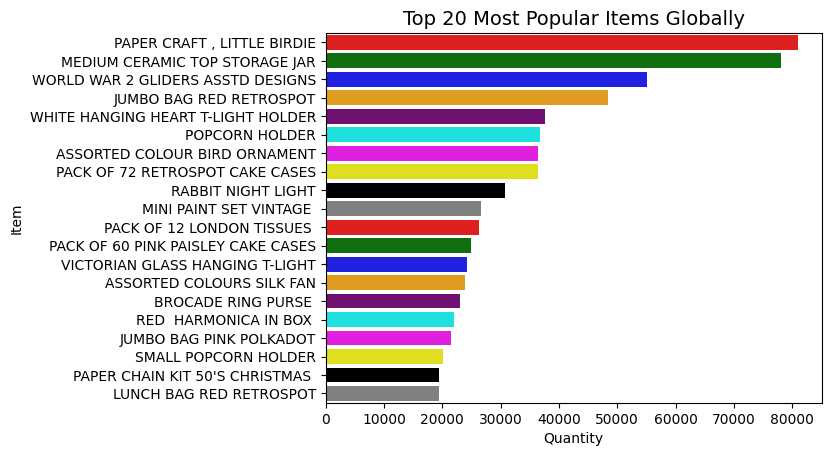

In [52]:

# Reset index if necessary
global_popularity.reset_index(inplace=True)

# Define the colors you want to use for each item
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'black', 'gray']

# Plot the bar plot with the specified colors
sns.barplot(y='Description', x='Quantity', data=global_popularity.head(20), palette=colors)

# Set title and labels
plt.title('Top 20 Most Popular Items Globally', fontsize=14)
plt.ylabel('Item')

# Show the plot
plt.show()


# Popuar items by country

In [53]:
countrywise=df_new.pivot_table(index=["Country","StockCode", "Description"], values='Quantity',aggfunc='sum').reset_index()


In [54]:
countrywise.head()

,Country,StockCode,Description,Quantity
0,Australia,15036,ASSORTED COLOURS SILK FAN,600
1,Australia,15056BL,EDWARDIAN PARASOL BLACK,3
2,Australia,16161P,WRAP ENGLISH ROSE,400
3,Australia,16169E,WRAP 50'S CHRISTMAS,25
4,Australia,20665,RED RETROSPOT PURSE,6


Text(0, 0.5, 'Item')

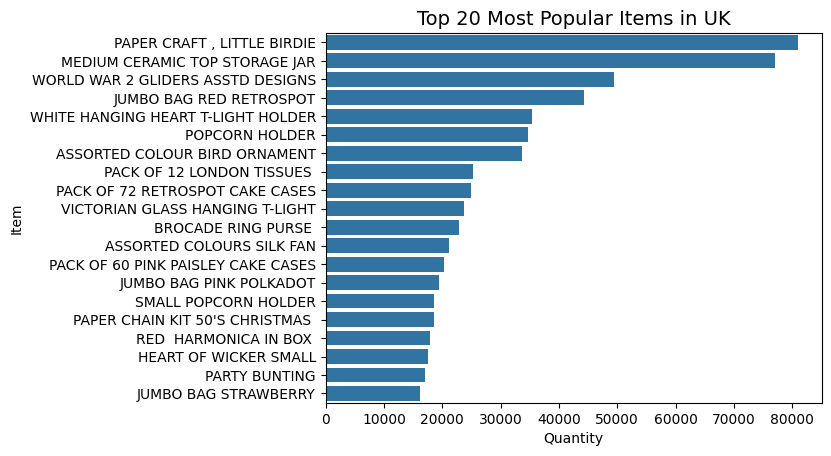

In [55]:
# vizualize top 10 most popular items in UK
sns.barplot(y='Description', x='Quantity', data=countrywise[countrywise
['Country']=='United Kingdom'].sort_values(by='Quantity', ascending=False).head(20))

plt.title('Top 20 Most Popular Items in UK', fontsize=14)
plt.ylabel('Item')

Most 20 popular items in Netherland

Text(0, 0.5, 'Item')

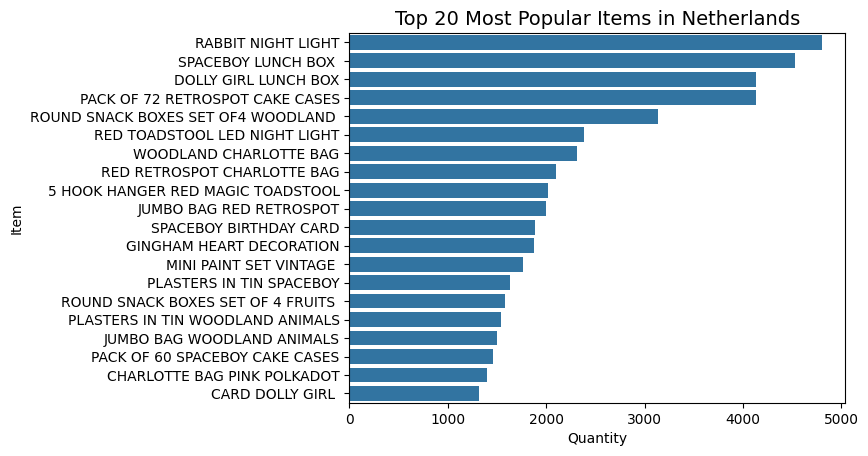

In [57]:
sns.barplot(y='Description', x='Quantity', data=countrywise[countrywise
['Country']=='Netherlands'].sort_values(by='Quantity', ascending=False).head(20))

plt.title('Top 20 Most Popular Items in Netherlands', fontsize=14)
plt.ylabel('Item')

RABBIT NIGHT LIGHT, SPACEBOY LUNCH BOX are the most popular items in Netherland

Text(0, 0.5, 'Item')

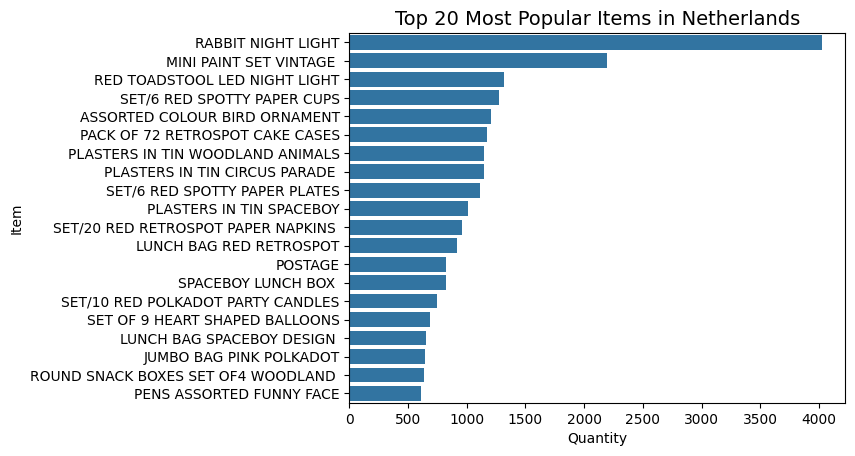

In [59]:
# 20 Most Popular items in France
sns.barplot(y='Description', x='Quantity', data=countrywise[countrywise
['Country']=='France'].sort_values(by='Quantity', ascending=False).head(20))

plt.title('Top 20 Most Popular Items in Netherlands', fontsize=14)
plt.ylabel('Item')

# Popular Items by month (Monthwise)

In [66]:
import datetime
#format datetime
df_new['InvoiceDate'] = pd.to_datetime(df_new.InvoiceDate, format='%m/%d/%Y %H:%M')
df_new.insert(loc=2, column='year_month', value=df_new['InvoiceDate'].map(lambda x: 100*x.year + x.month))
df_new.insert(loc=3, column='month', value=df_new.InvoiceDate.dt.month)
# +1 to make Monday=1.....until Sunday=7
df_new.insert(loc=4, column='day', value=(df_new.InvoiceDate.dt.dayofweek)+1)
df_new.insert(loc=5, column='hour', value=df_new.InvoiceDate.dt.hour)

In [72]:
df_new.head()

,InvoiceNo,StockCode,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,201012,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Text(0, 0.5, 'Item')

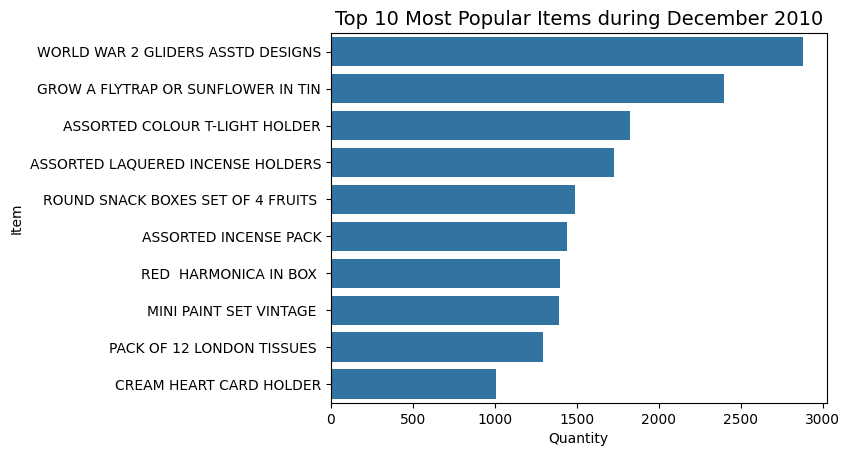

In [67]:
#viz - popular items by month
sns.barplot(y='Description', x='Quantity', data=df_new[df_new['year_month']==201012].sort_values(by='Quantity', ascending=False).head(10))
plt.title('Top 10 Most Popular Items during December 2010', fontsize=14)
plt.ylabel('Item')

Text(0, 0.5, 'Item')

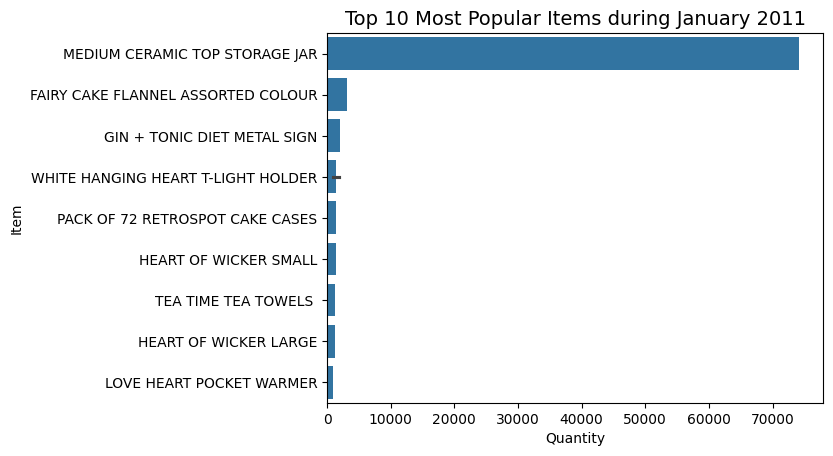

In [68]:
#viz
sns.barplot(y='Description', x='Quantity', data=df_new[df_new['year_month']==201101].sort_values(by='Quantity', ascending=False).head(10))
plt.title('Top 10 Most Popular Items during January 2011', fontsize=14)
plt.ylabel('Item')

Text(0, 0.5, 'Item')

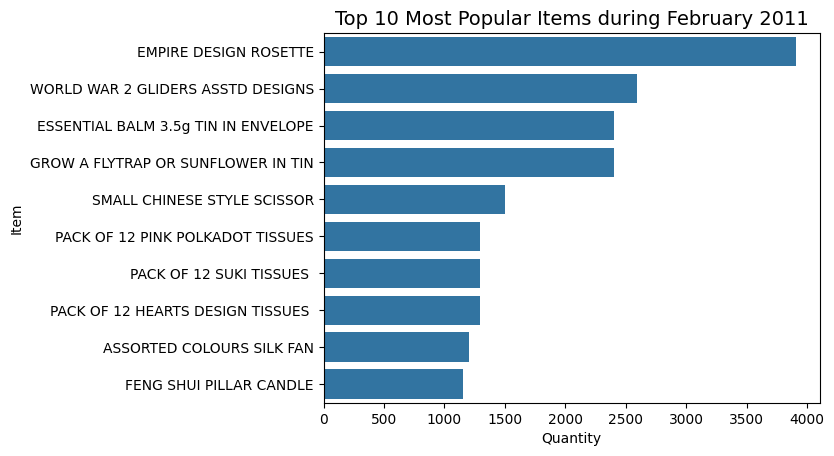

In [69]:
sns.barplot(y='Description', x='Quantity', data=df_new[df_new['year_month']==201102].sort_values(by='Quantity', ascending=False).head(10))
plt.title('Top 10 Most Popular Items during February 2011', fontsize=14)
plt.ylabel('Item')

Text(0, 0.5, 'Item')

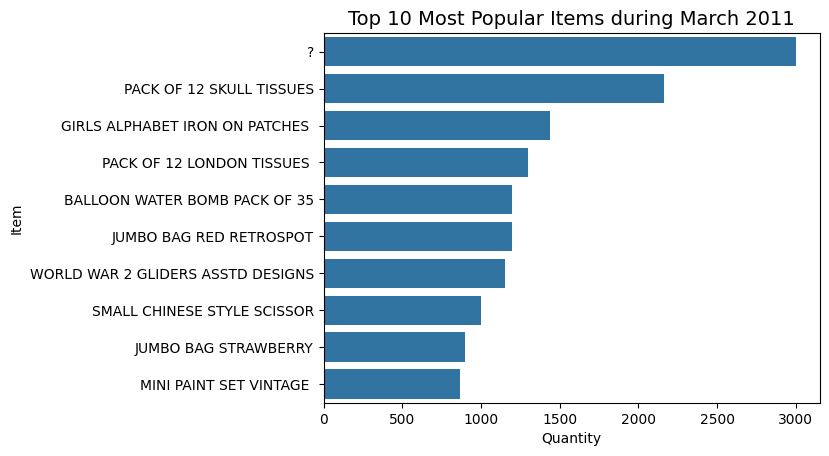

In [70]:
sns.barplot(y='Description', x='Quantity', data=df_new[df_new['year_month']==201103].sort_values(by='Quantity', ascending=False).head(10))
plt.title('Top 10 Most Popular Items during March 2011', fontsize=14)
plt.ylabel('Item')

RABBIT NIGHT LIGHT is the most popular item in France also

# Rule-Based RecSys based on Buy Again

In [60]:
from collections import Counter

In [61]:
def buy_again(customerid):
     # Fetching the items bought by the customer for provided customer id
     items_bought=df_new[df_new['CustomerID']==customerid].Description
     # Count and sort the repeated purchases
     bought_again = Counter(items_bought)
     # Convert counter to list for printing recommendations
     buy_again_list = list(bought_again)
     
     # Printing the recommended items
     print("Item you would like to buy again:")
     
     return buy_again_list
 

Recommendations for some user

In [62]:
buy_again(17850)

Item you would like to buy again:


['WHITE HANGING HEART T-LIGHT HOLDER',
 'WHITE METAL LANTERN',
 'CREAM CUPID HEARTS COAT HANGER',
 'KNITTED UNION FLAG HOT WATER BOTTLE',
 'RED WOOLLY HOTTIE WHITE HEART.',
 'SET 7 BABUSHKA NESTING BOXES',
 'GLASS STAR FROSTED T-LIGHT HOLDER',
 'HAND WARMER UNION JACK',
 'HAND WARMER RED POLKA DOT',
 'EDWARDIAN PARASOL RED',
 'RETRO COFFEE MUGS ASSORTED',
 'SAVE THE PLANET MUG',
 'VINTAGE BILLBOARD DRINK ME MUG',
 'VINTAGE BILLBOARD LOVE/HATE MUG',
 'WOOD 2 DRAWER CABINET WHITE FINISH',
 'WOOD S/3 CABINET ANT WHITE FINISH',
 'WOODEN PICTURE FRAME WHITE FINISH',
 'WOODEN FRAME ANTIQUE WHITE ',
 'EDWARDIAN PARASOL BLACK',
 'IVORY EMBROIDERED QUILT ',
 'JUMBO SHOPPER VINTAGE RED PAISLEY']

In [65]:
buy_again(12680.)

Item you would like to buy again:


['PACK OF 12 WOODLAND TISSUES ',
 'PACK OF 12 PINK POLKADOT TISSUES',
 'ROBOT BIRTHDAY CARD',
 'BUNDLE OF 3 SCHOOL EXERCISE BOOKS  ',
 'PLASTERS IN TIN STRONGMAN',
 'SPACEBOY LUNCH BOX ',
 'PANTRY SCRUBBING BRUSH',
 'PANTRY WASHING UP BRUSH',
 'CARD DOLLY GIRL ',
 'DOLLY GIRL LUNCH BOX',
 "CHILDREN'S APRON DOLLY GIRL ",
 'CHILDRENS CUTLERY DOLLY GIRL ',
 'CHILDRENS APRON SPACEBOY DESIGN',
 'SPACEBOY BIRTHDAY CARD',
 'CHILDRENS CUTLERY SPACEBOY ',
 'ALARM CLOCK BAKELIKE PINK',
 'ALARM CLOCK BAKELIKE RED ',
 'CARAVAN SQUARE TISSUE BOX',
 'ROUND SNACK BOXES SET OF4 WOODLAND ',
 'POSTAGE',
 'ALARM CLOCK BAKELIKE IVORY',
 'ALARM CLOCK BAKELIKE GREEN',
 'RED RETROSPOT CHILDRENS UMBRELLA',
 'FAIRY CAKE BIRTHDAY CANDLE SET',
 'PASTEL COLOUR HONEYCOMB FAN',
 'FUNKY WASHING UP GLOVES ASSORTED',
 'PLASTERS IN TIN CIRCUS PARADE ',
 'CHILDS BREAKFAST SET SPACEBOY ',
 'CHILDS BREAKFAST SET DOLLY GIRL ',
 'CIRCUS PARADE LUNCH BOX ',
 'PACK OF 20 SPACEBOY NAPKINS',
 'CHILDRENS CUTLERY CIRCUS PARADE',
